<a href="https://colab.research.google.com/github/amilkh/cs230-fer/blob/error-analysis/fer2013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import load_model
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
! rm -rf dev; mkdir dev
! unzip -q '/content/drive/My Drive/cs230 project/dataset/webcam amil.zip' -d dev
! unzip -q '/content/drive/My Drive/cs230 project/dataset/webcam paki.zip' -d dev

In [0]:
def get_datagen(dataset):
    return ImageDataGenerator().flow_from_directory(
              dataset,
              target_size=(48, 48),
              color_mode='grayscale',
              shuffle = True,
              class_mode='categorical',
              batch_size=32)

In [6]:
from skimage import io, transform

X_dev_gen    = get_datagen('/content/dev')

X_dev = np.zeros((len(X_dev_gen.filepaths), 48, 48, 1))
Y_dev = np.zeros((len(X_dev_gen.filepaths), 7))
for i in range(0,len(X_dev_gen.filepaths)):
  x = io.imread(X_dev_gen.filepaths[i], as_gray=True)
  X_dev[i,:] = transform.resize(x, (48,48,1))
  Y_dev[i,X_dev_gen.classes[i]] = 1

Found 204 images belonging to 7 classes.


In [0]:
model = load_model('/content/drive/My Drive/cs230 project/models/webcam-SGD_LR_0.01000-EPOCHS_100-BS_128-DROPOUT_0.35test_acc_0.698.h5')

In [0]:
# TODO: subtract probabilities?
y_pred_probs = model.predict(X_dev)
y_pred = y_pred_probs.argmax(axis=1)
y_true = Y_dev.argmax(axis=1)

In [10]:
incorrect = np.count_nonzero(y_pred-y_true)
print("Accuracy on dev images: {:.2%}".format(1.0 - incorrect/len(y_true)))

Accuracy on dev images: 66.18%


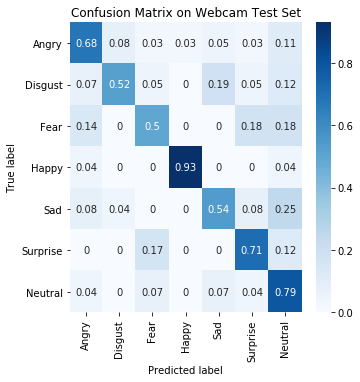

In [37]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

emotions = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

cmat_df_test=pd.DataFrame(
  confusion_matrix(y_true, y_pred, normalize='true').round(2),
  index=emotions.values(), 
  columns=emotions.values()
  )

plt.figure(figsize=(5,5))
heatmap(cmat_df_test,annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Confusion Matrix on Webcam Test Set')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
# angry: many images classified like this
# disgust: not many images classified disgust
# fear: not many images classified fear
# happy is grea, high precision
# sad: many disgust predicted sad
# surprise: some fears are surprise
# neutral: low precision, many other emotions classified as neutral (sad)

In [0]:
emotions = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

In [38]:
for i in range(0, len(y_pred)):
  if emotions[y_true[i]] == 'Sad' and emotions[y_pred[i]] == 'Neutral':
      print(i)

132
133
134
141
149
150


4 sad/sad1.png
[0.17072856 0.1545521  0.06533726 0.00391207 0.12283824 0.06449892
 0.41813275]


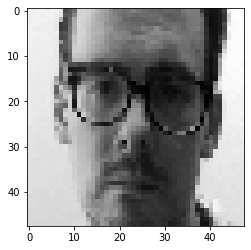

<Figure size 432x288 with 0 Axes>

In [49]:
i=149

print(X_dev_gen.filenames[i])
plt.imshow(X_dev[i].reshape(48,48),cmap='gray')
plt.figure()
print(y_pred_probs[i])